In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Dataset

In [3]:
healthy_corals = "/content/drive/MyDrive/dataset/coral_disease/healthy_corals"
bleached_corals = "/content/drive/MyDrive/dataset/coral_disease/bleached_corals"

## Data Preparation

In [4]:
directory_list = [healthy_corals, bleached_corals]
classes = ['Healthy','Bleached']

filepaths = []
labels = []

In [5]:
for i,j in zip(directory_list, classes):
    filelist = os.listdir(i)
    for name in filelist:
        filepath = os.path.join(i, name)
        print(filepath)
        filepaths.append(filepath)
        labels.append(j)

/content/drive/MyDrive/dataset/coral_disease/healthy_corals/1063594275_418daec726_b_0_2088.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/11335716606_517eb63e0d_b_0_8398.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12678410645_623fc2f1d0_b_0_2742.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12618485353_670ca1b648_o_0_3923.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10167343533_ea141f7e70_b_0_5391.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12585421735_ebb6521075_o_0_8477.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10493549203_b71d6746b0_o_0_1508.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10472474274_1f73391912_o_0_7406.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10493371746_61da3099a1_o_0_7809.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10160888014_be7c71167c_o_0_1341.jpg
/content/drive/MyDrive/dataset/coral_dise

In [6]:
print('filepaths:', len(filepaths), 'labels:', len(labels))

filepaths: 923 labels: 923


In [7]:
file_content=pd.Series(filepaths, name='filepaths') # membuat kolom filepaths
label_content=pd.Series(labels, name='labels') #membuat kolom labels

df=pd.concat([file_content,label_content], axis=1) #menggabungkan menjadi 2kolom diatas menjadi table
df=pd.DataFrame(np.array(df).reshape(len(filepaths),2), columns = ['filepaths', 'labels']) #membuat menjadi table

In [8]:
df #memanggil table

,filepaths,labels
0,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
1,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
2,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
3,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
4,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
...,...,...
918,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
919,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
920,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
921,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached


## EDA

In [9]:
label_counts = df['labels'].value_counts() # Menghitung jumlah setiap label/target
print(label_counts)

labels
Bleached    485
Healthy     438
Name: count, dtype: int64


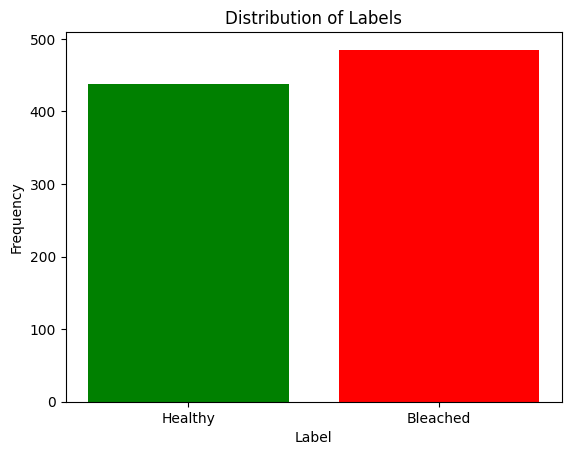

In [10]:
colors = ['green', 'red'] #memberikan warna pada grafik

#mengurutkan berdasarkan label/target
label_counts_ordered = label_counts.reindex(classes)

#menampilkan grafik batang
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

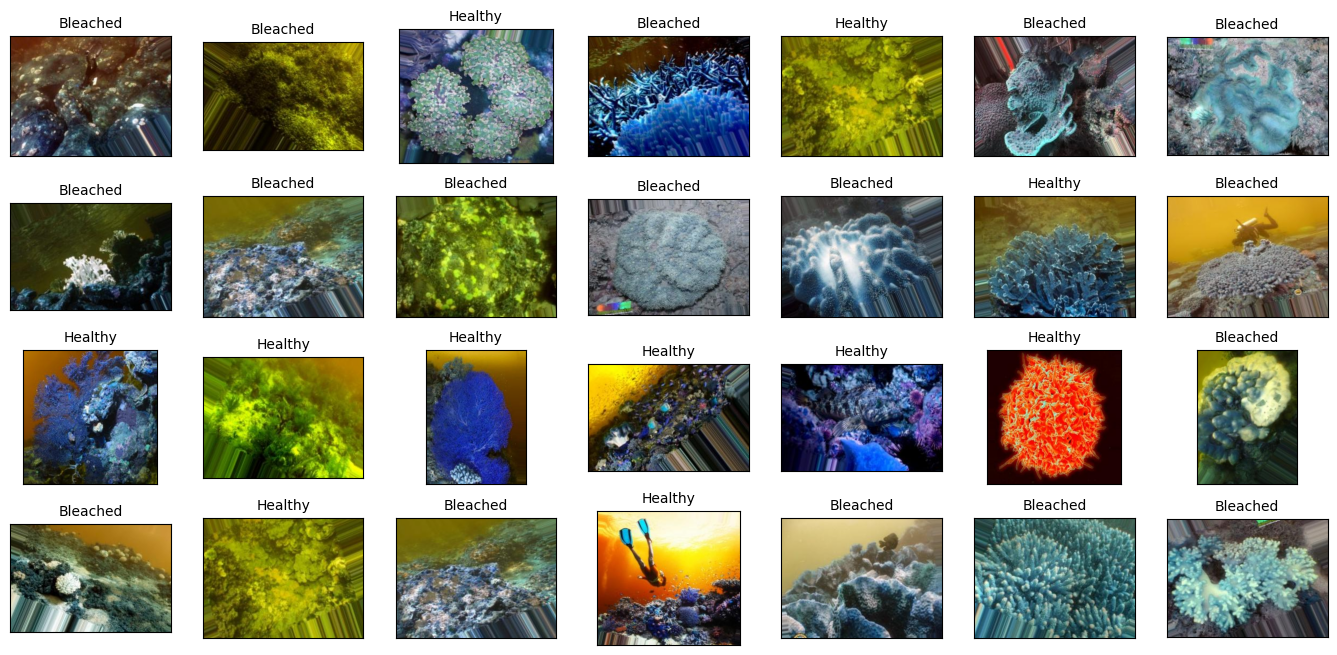

In [11]:
import cv2 # menggunakan library computer vision

# inisiasi untuk menampilkan data gambar
plt.figure(figsize=(17,8))
x1 = 4
x2 = 7
has = x1 * x2

# menampilkan data gambar
for i in range(has):
    random = np.random.randint(1,len(df))
    plt.subplot(x1,x2,i+1)
    image = cv2.imread(df.loc[random,"filepaths"])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[random, "labels"], size = 10)
    plt.xticks([])
    plt.yticks([])

## Augmentation Data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 923

datagen = ImageDataGenerator(
    rotation_range=75,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range = 0.1,
    fill_mode='nearest',
)

X, y = [], []

data_dir = '/content/drive/MyDrive/dataset/coral_disease/'
train_dataset = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, shuffle=True)

X, y = next(train_dataset)

Found 923 images belonging to 2 classes.


## Split Data

In [31]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


print("Pembagian Data Training, Validation & Testing\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Pembagian Data Training, Validation & Testing

Train     	 [(np.int64(0), 392), (np.int64(1), 346)]
Validation	 [(np.int64(0), 77), (np.int64(1), 71)]
Test      	 [(np.int64(0), 16), (np.int64(1), 21)]


In [32]:
print("Banyak Sample Setiap Kelass:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

print("Nama Kelas Pada Index:\t", train_dataset.class_indices)

Banyak Sample Setiap Kelass:	 [(np.int64(0), 485), (np.int64(1), 438)]
Nama Kelas Pada Index:	 {'bleached_corals': 0, 'healthy_corals': 1}


In [33]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (738, 150, 150, 3)
y_train shape: (738, 2)
X_test shape: (37, 150, 150, 3)
y_test shape: (37, 2)


## Implementasi Algoritma/Model Arsitektur

In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam , Adamax
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import  Sequential

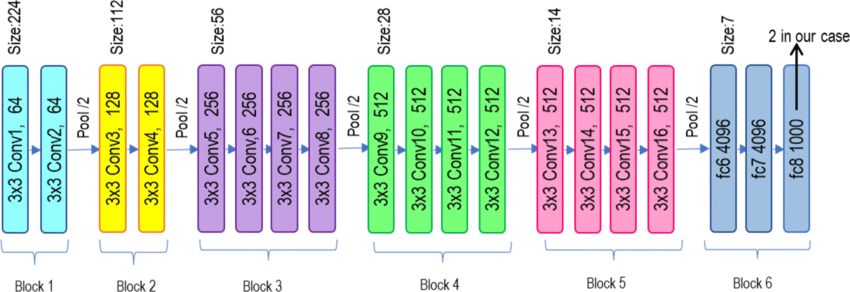

In [23]:
## Tanpa Library VGG19
model = Sequential()
#BLOK 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
#BLOK 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
#BLOK 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
#BLOK 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
#BLOK 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
#BLOK 6
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




```
## Library VGG19
# base_module = tf.keras.applications.VGG19(
#     input_shape=(150, 150, 3),
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )

# base_module.trainable = False
# outLayer = base_module.output
# outLayer = GlobalAveragePooling2D()(outLayer)
# outLayer = Flatten()(outLayer)
# outLayer = Dense(128, activation='relu')(outLayer)
# outLayer = Dropout(0.5)(outLayer)
# predictions = Dense(2, activation='softmax')(outLayer)

# model = Model(inputs=base_module.input, outputs=predictions)```



```
def build_vgg19():
    model = models.Sequential()
    Layer/Blok 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    Layer/Blok 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    Layer/Blok 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    Layer/Blok 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    return model
```



In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,19

 Total params: 70,372,418 (268.45 MB)

 Trainable params: 70,372,418 (268.45 MB)

 Non-trainable params: 0 (0.00 B)

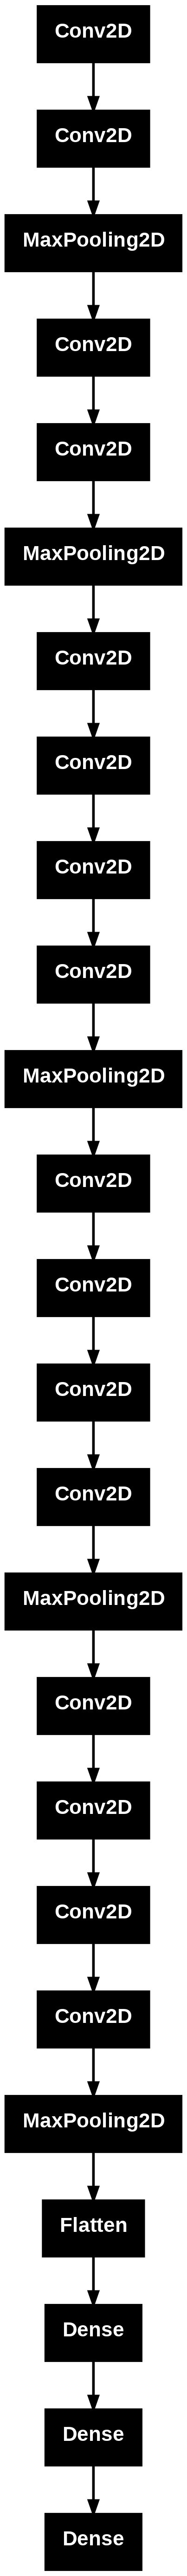

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model)

## Fitting Model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

Epochs = 50

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=Epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4991 - loss: 202.6384 - val_accuracy: 0.4324 - val_loss: 0.6962
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.4890 - loss: 0.6941 - val_accuracy: 0.4324 - val_loss: 0.6952
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.5337 - loss: 0.7162 - val_accuracy: 0.4324 - val_loss: 0.7057
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.5297 - loss: 1.2878 - val_accuracy: 0.4324 - val_loss: 0.7092
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.5355 - loss: 0.6913 - val_accuracy: 0.4324 - val_loss: 0.7030


In [27]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss + 1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

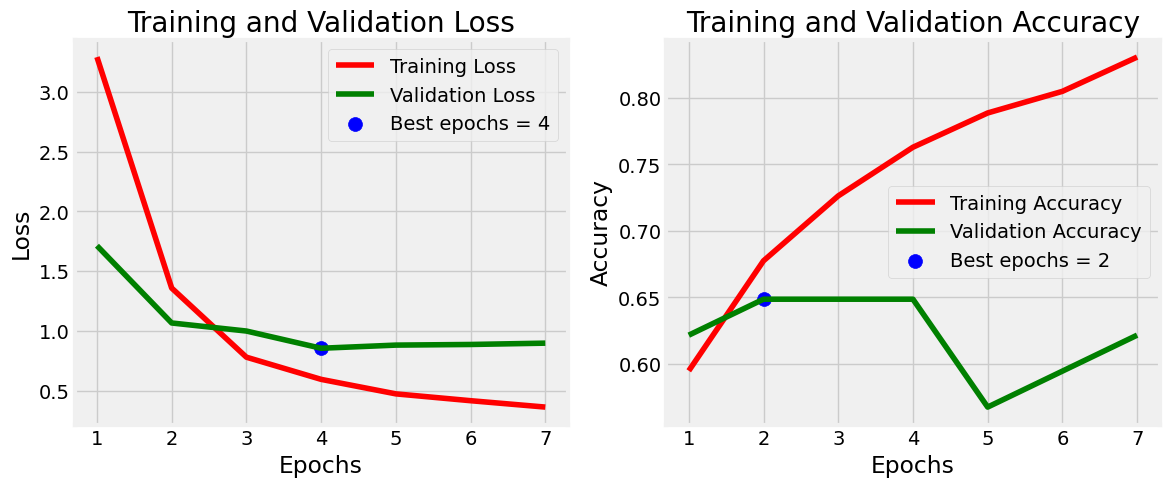

In [ ]:
plt.figure(figsize= (14,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 100 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 100 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

## Evaluasi Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6512 - loss: 0.8442 


In [ ]:
preds = model.predict(X_test)

y_pred = np.argmax(preds , axis = 1)

y_test_label = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 784ms/step


## Performa Kinerja Model

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix , classification_report

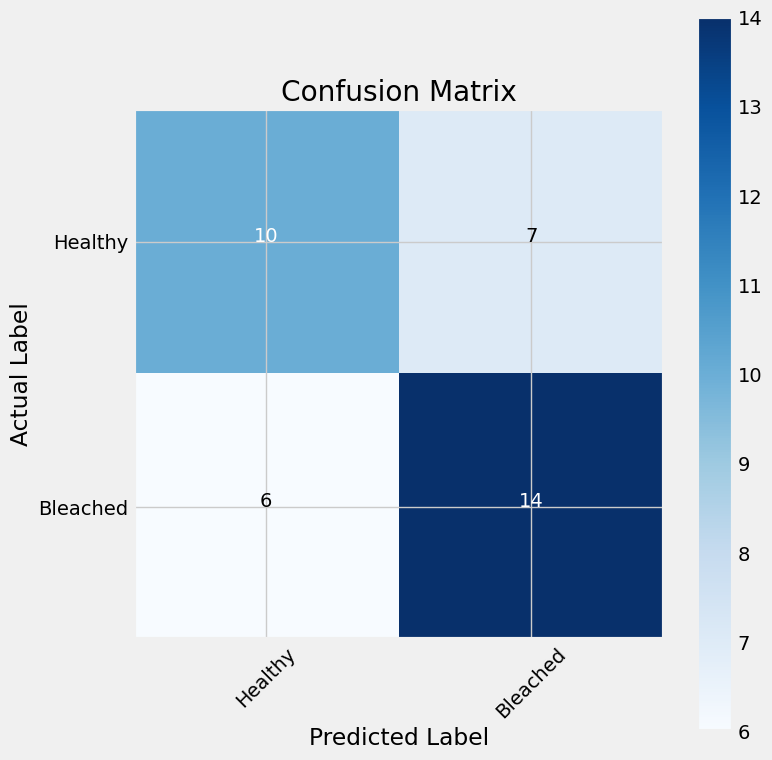

In [ ]:
cm = confusion_matrix(y_test_label, y_pred)

plt.figure(figsize= (8, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(y_test_label, y_pred , target_names= classes))

              precision    recall  f1-score   support

     Healthy       0.62      0.59      0.61        17
    Bleached       0.67      0.70      0.68        20

    accuracy                           0.65        37
   macro avg       0.65      0.64      0.64        37
weighted avg       0.65      0.65      0.65        37



## Pengujian Data

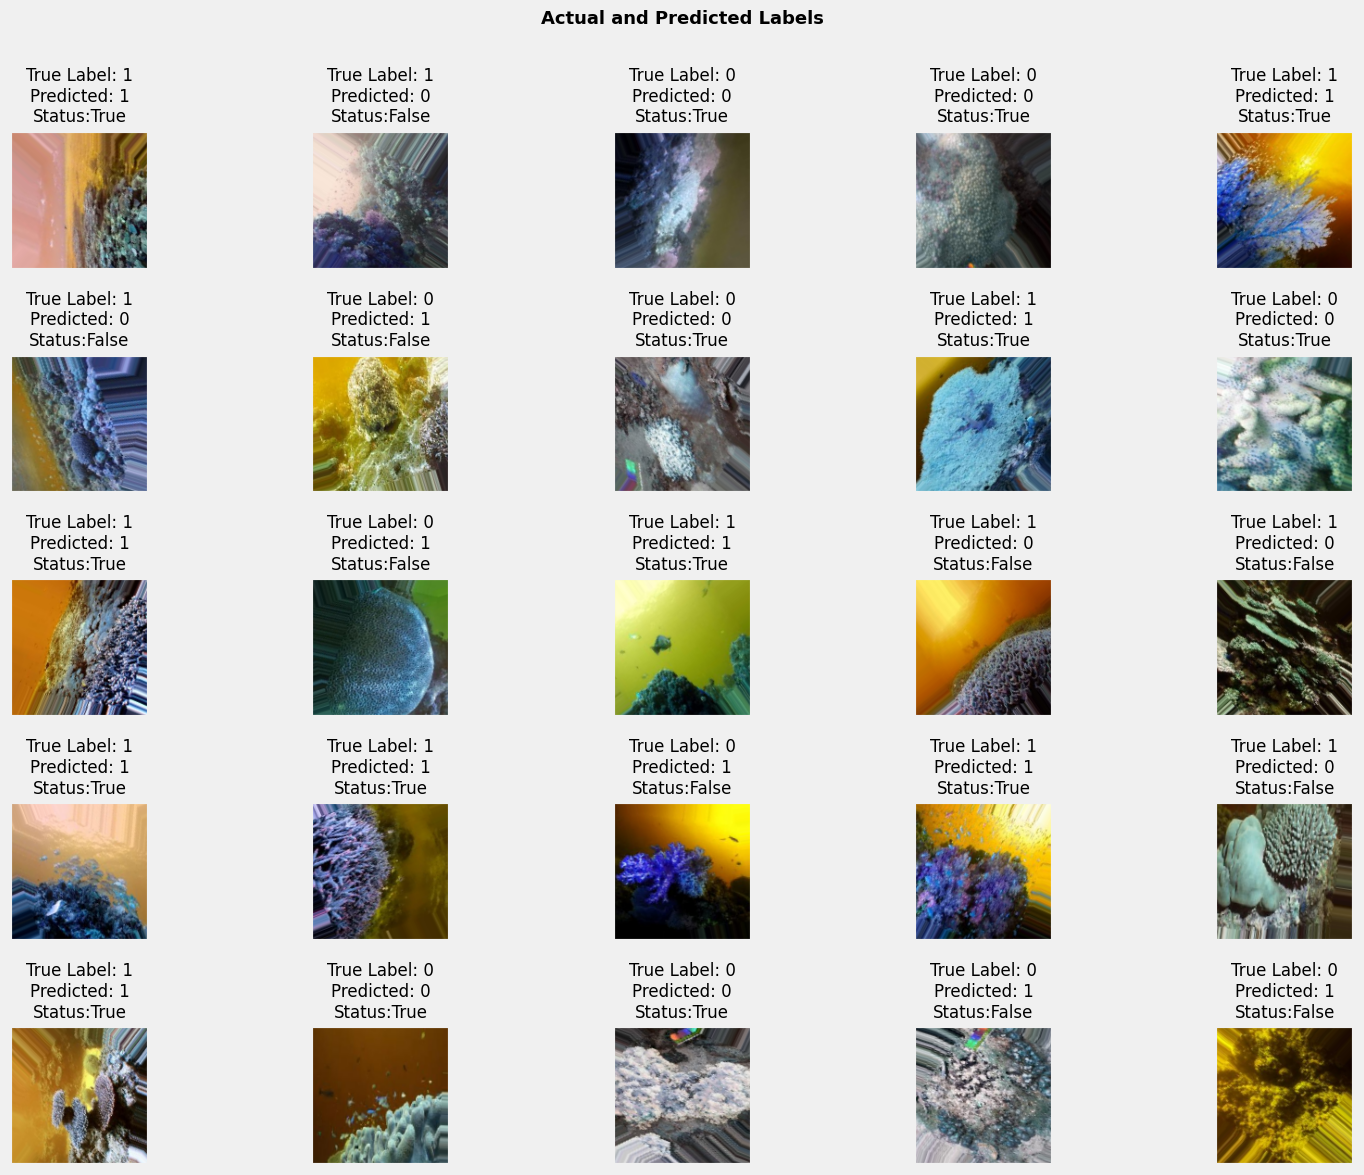

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(16,12), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    result=y_test_label[i] == y_pred[i]
    ax.imshow(X_test[i].astype("uint8"))
    ax.set_title(f"True Label: {y_test_label[i]}\nPredicted: {y_pred[i]}\nStatus:{result}", fontsize=12)

plt.suptitle("Actual and Predicted Labels\n", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()